In [3]:
# importar bibliotecas
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# vamos importar dados
casa_df = pd.read_csv('kc-house-data.csv', encoding='ISO-8859-1')

In [7]:
casa_df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [10]:
casa_df.head(3)

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   

   sqft_lot15  
0        5650  
1        7639  
2        8062  

[3 rows x 21 columns]

In [12]:
# visualizar as últimas 3 linhas
casa_df.tail(3)

id             date     price  bedrooms  bathrooms  \
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[3 rows x 21 columns]

In [14]:
casa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [16]:
casa_df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

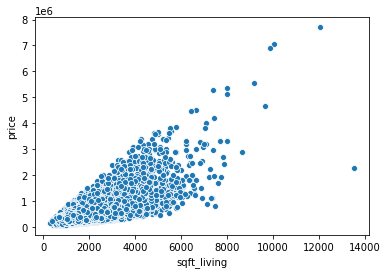

In [18]:
sns.scatterplot(x='sqft_living', y='price', data=casa_df)

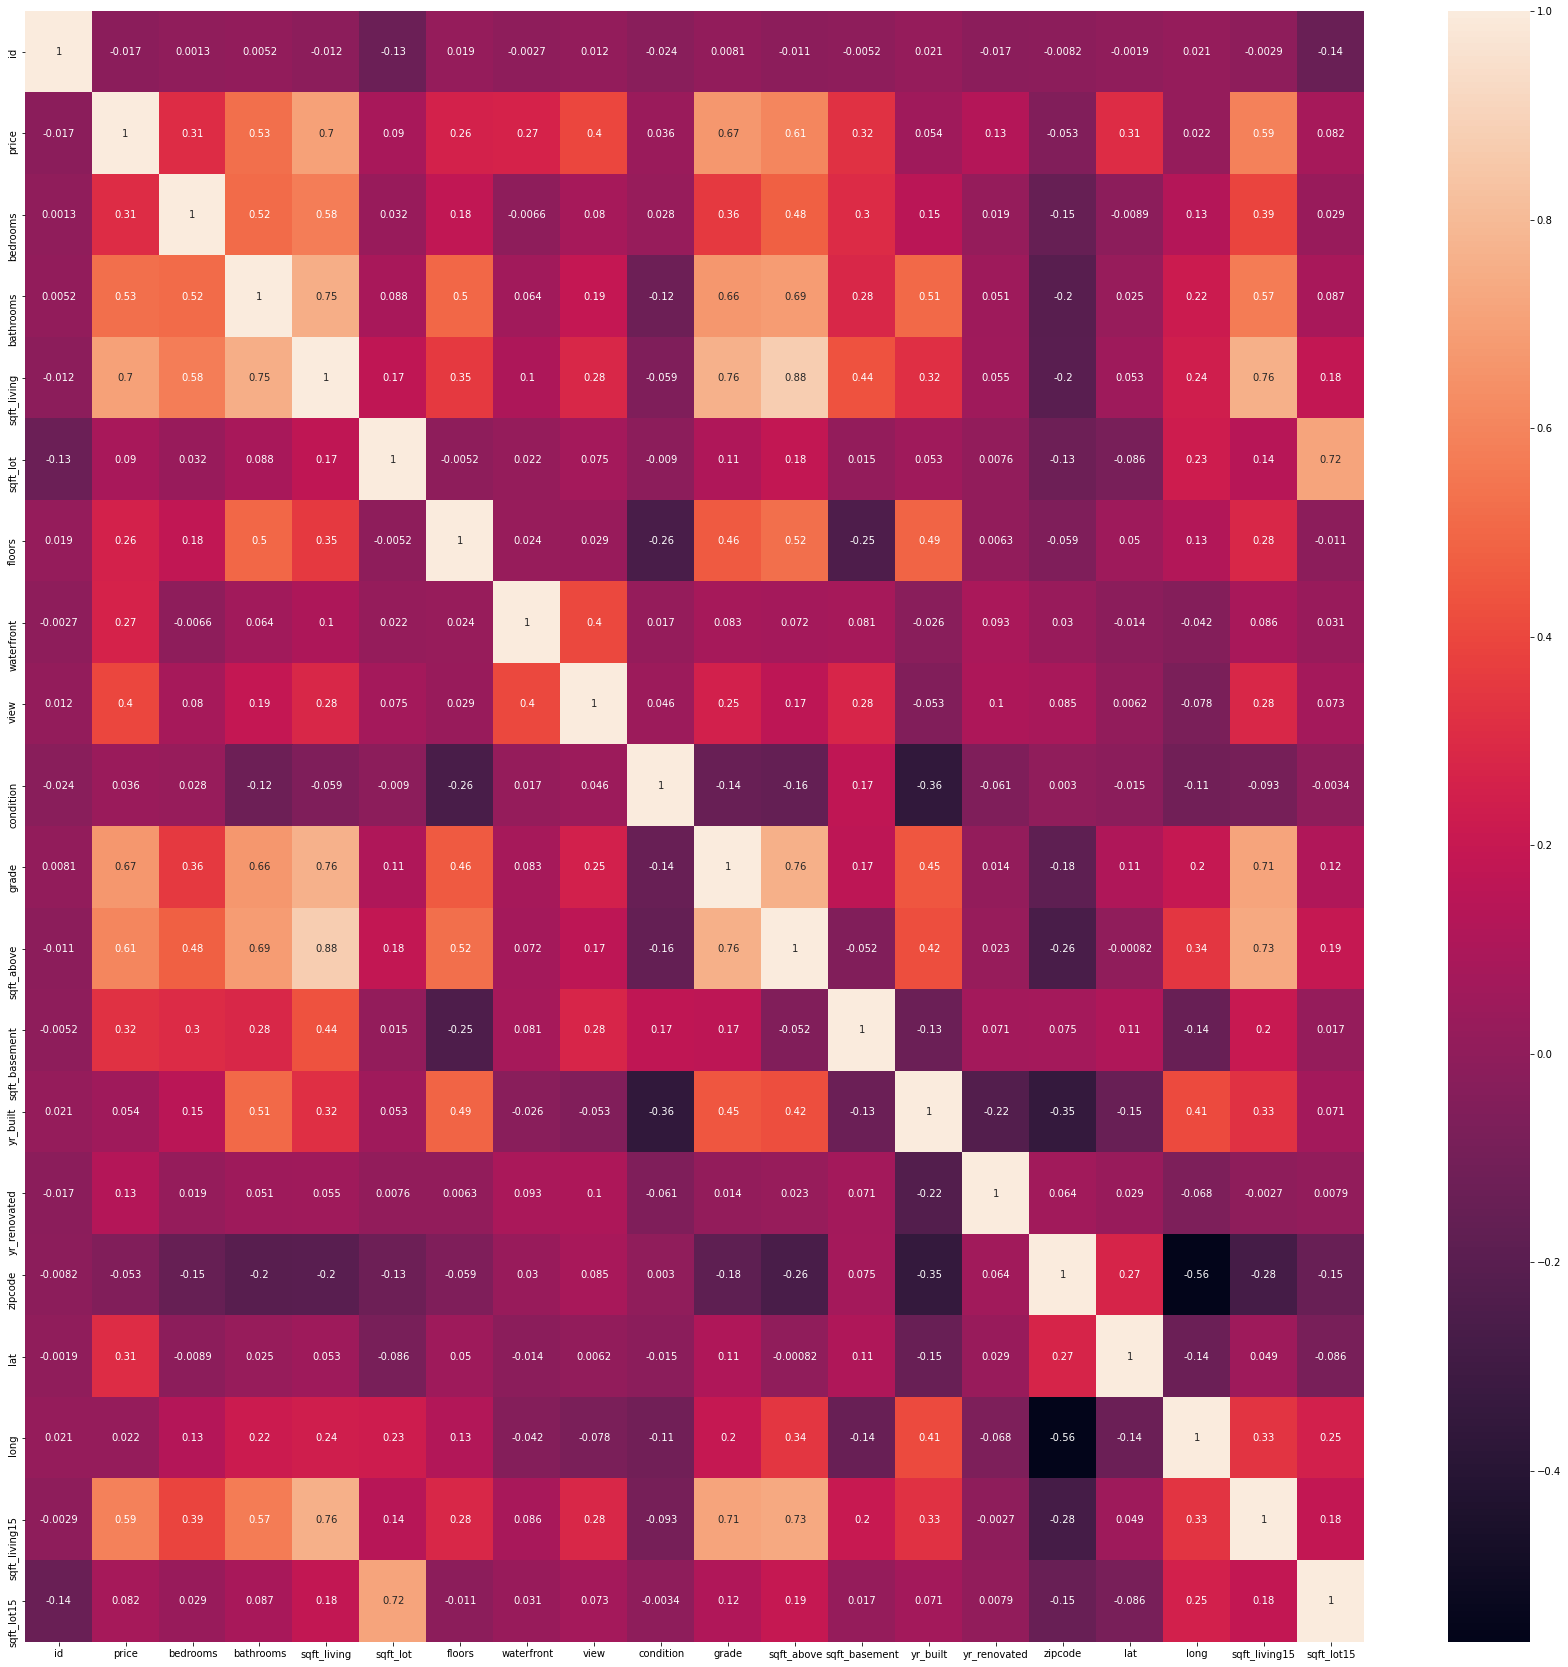

In [20]:
# aumenta a figura
plt.subplots(figsize=(30,30))
sns.heatmap(casa_df.corr(), annot=True)

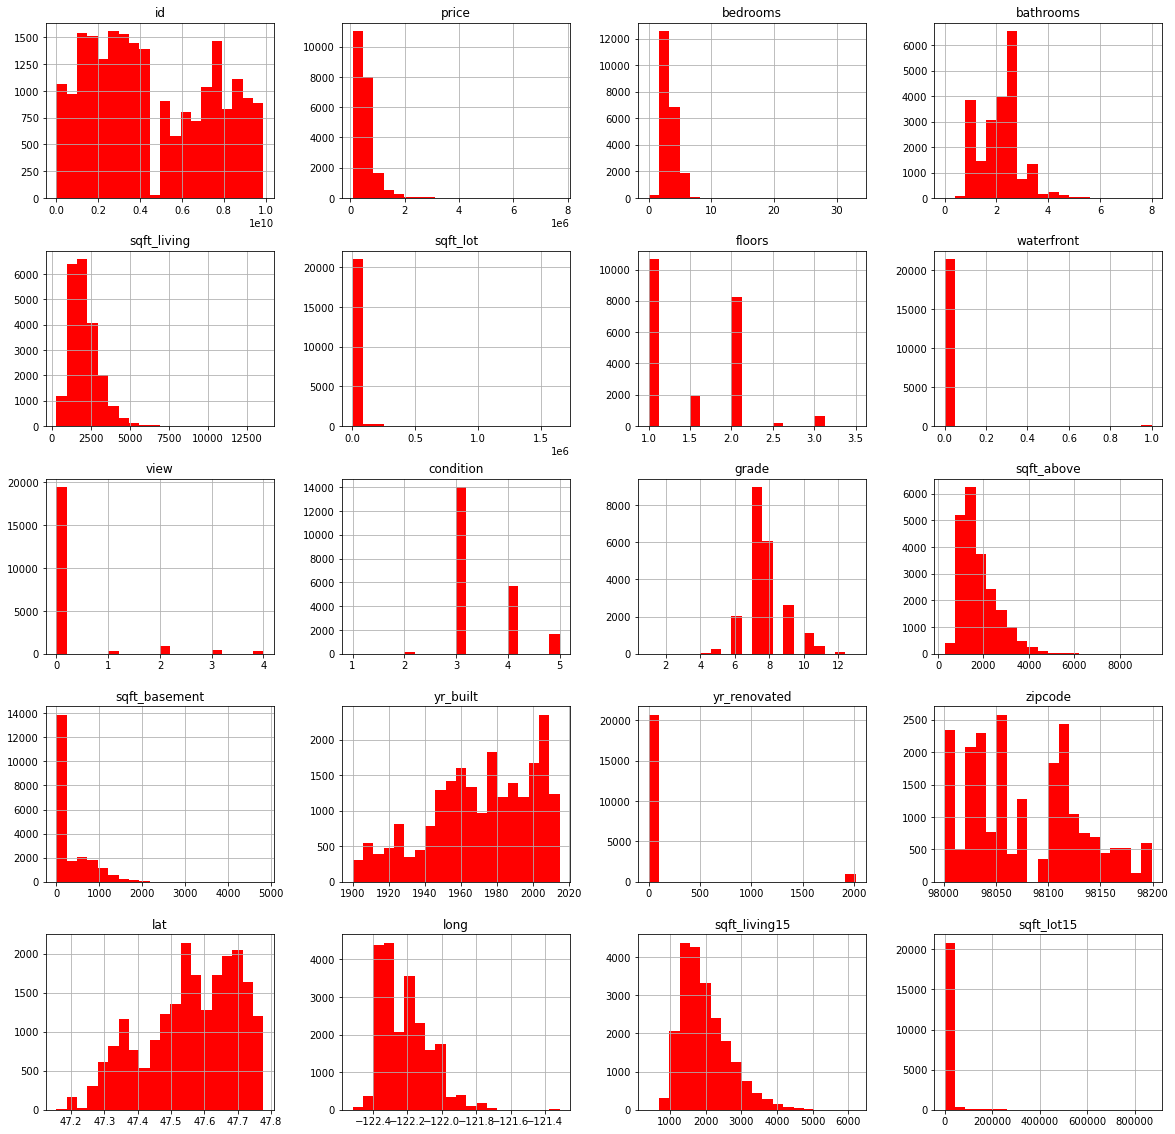

In [25]:
casa_df.hist(bins=20, figsize=(20,20), color='r');

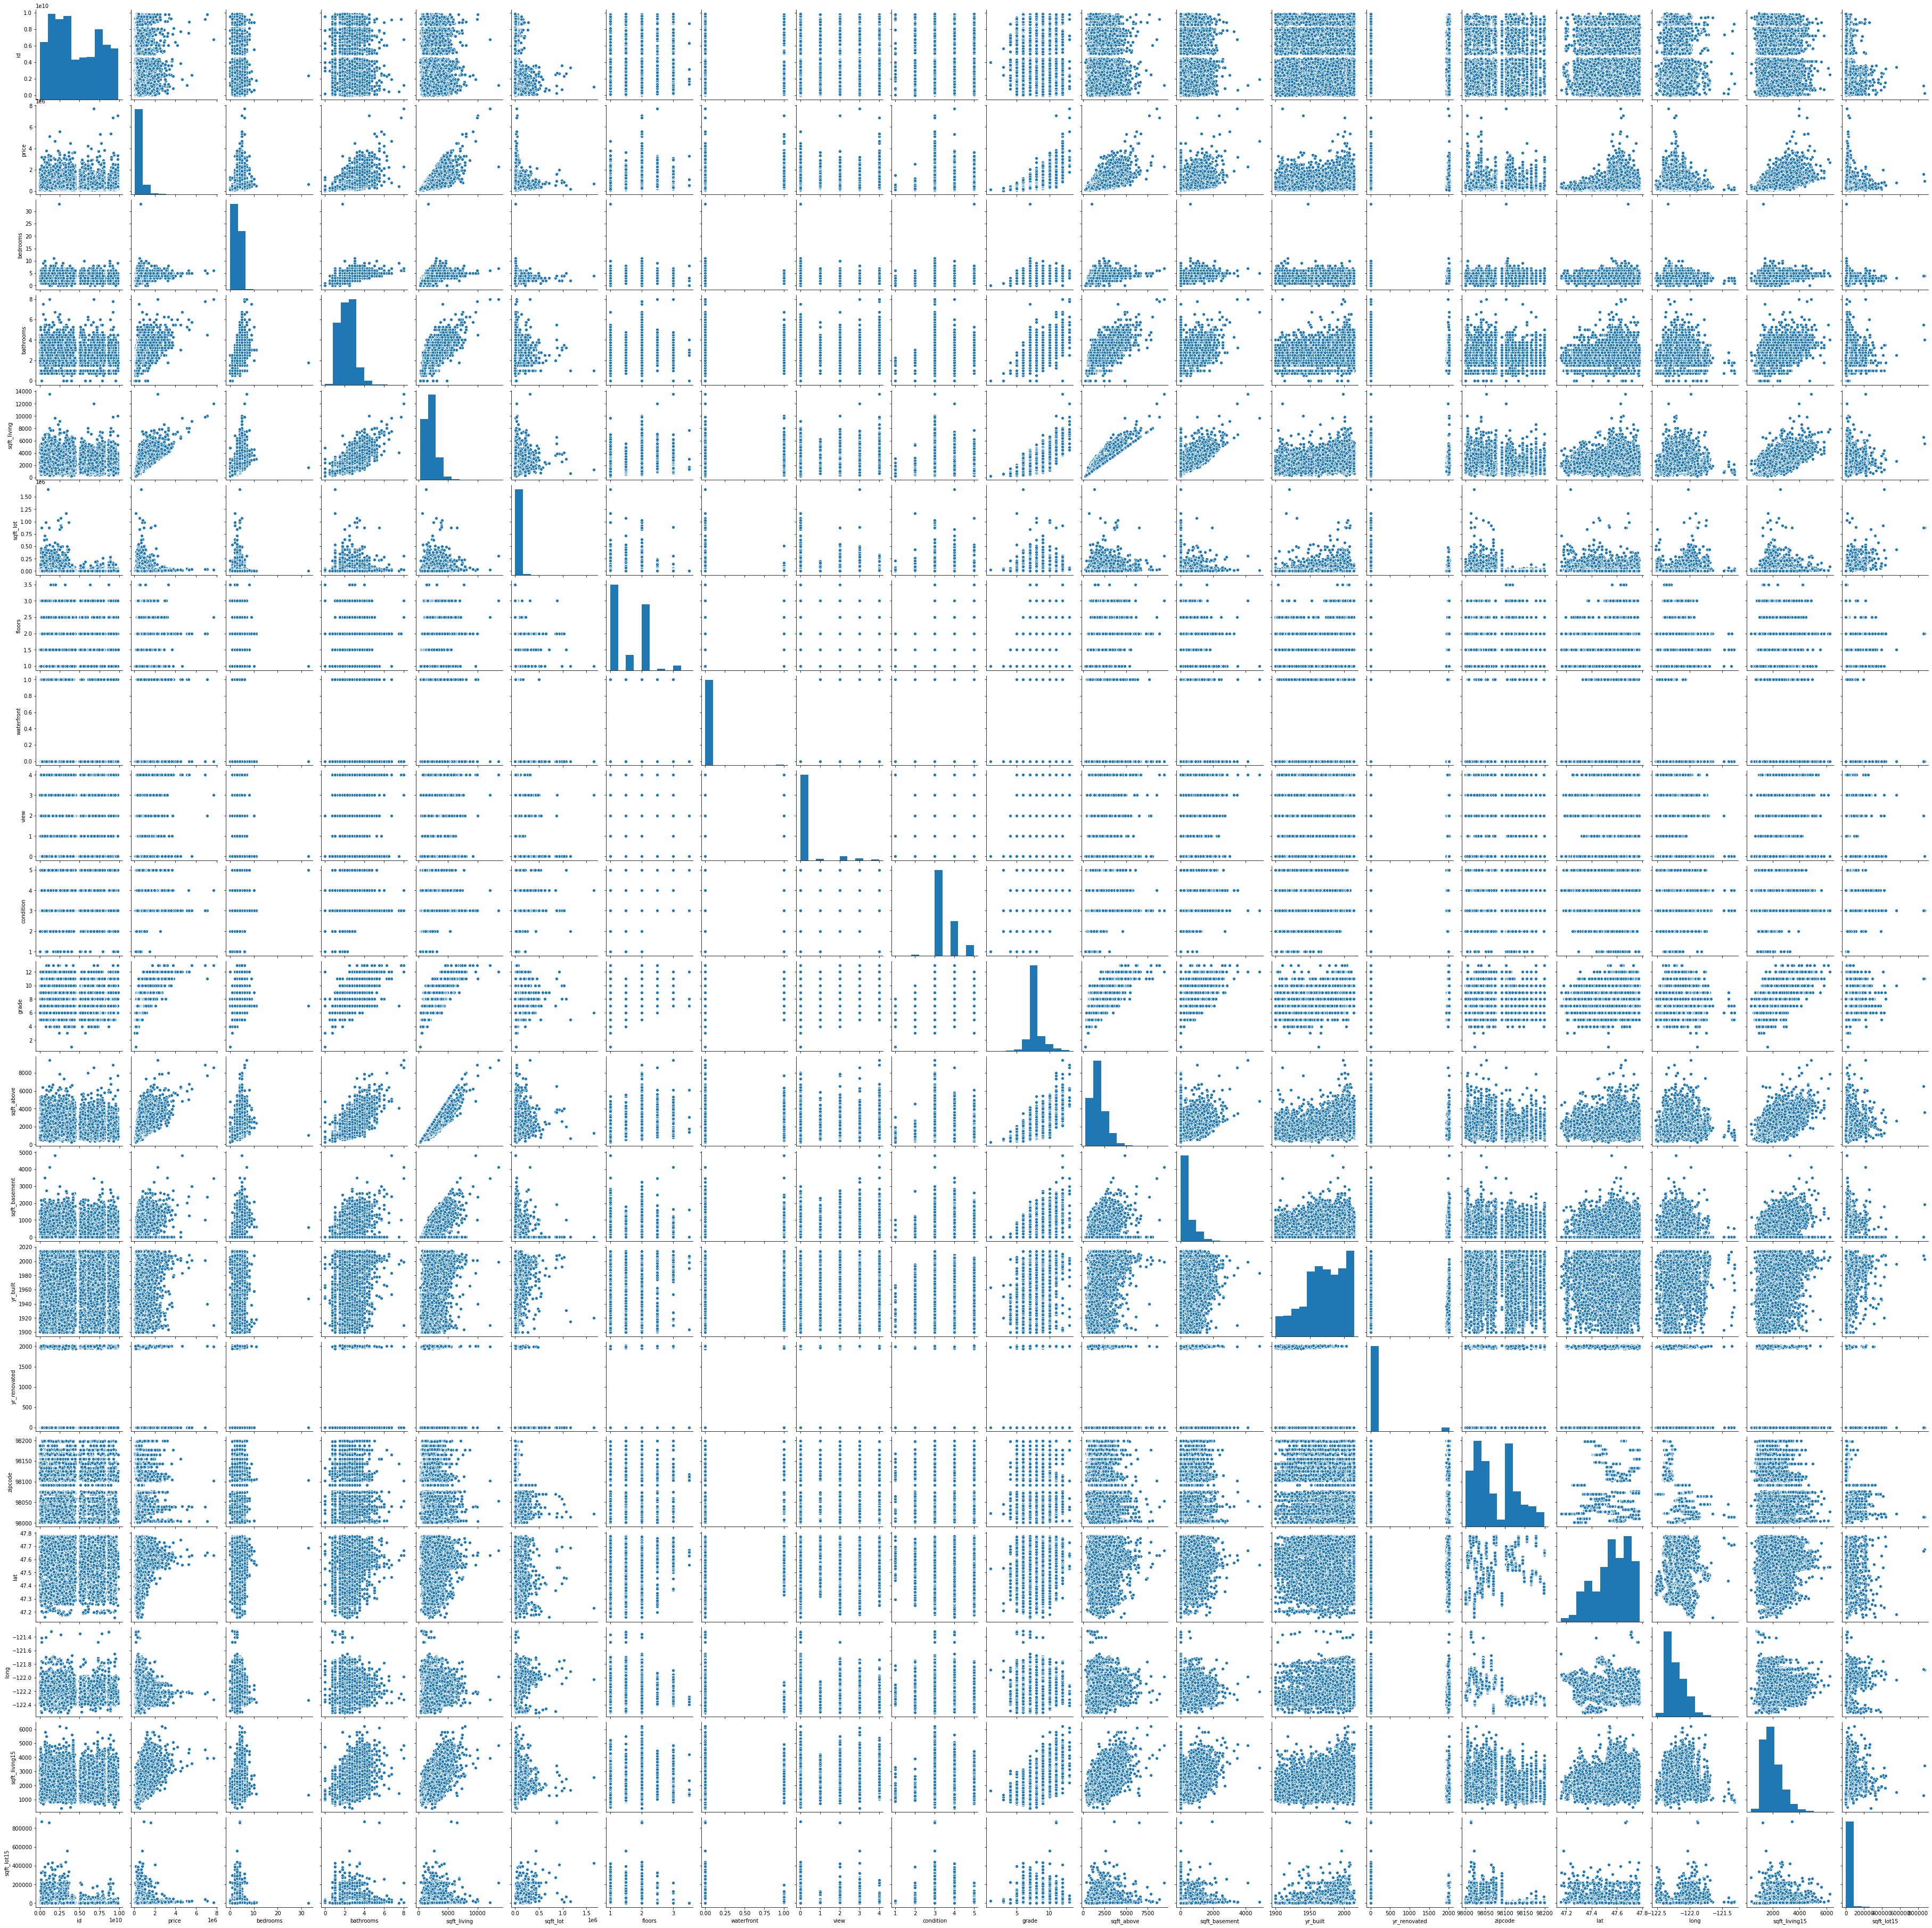

In [26]:
sns.pairplot(casa_df)

In [28]:
# price 	

# bedrooms 	bathrooms 	sqft_living 	sqft_lot 	floors 	waterfront 	view 	condition 	grade 	sqft_above 	sqft_basement 	yr_built 	yr_renovated 	zipcode 	lat 	long 	sqft_living15 	sqft_lot15

caracteristicas_selecionadas = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [29]:
X = casa_df[caracteristicas_selecionadas]

In [31]:
X.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0         3       1.00         1180      5650     1.0        1180   
1         3       2.25         2570      7242     2.0        2170   
2         2       1.00          770     10000     1.0         770   
3         4       3.00         1960      5000     1.0        1050   
4         3       2.00         1680      8080     1.0        1680   

   sqft_basement  
0              0  
1            400  
2              0  
3            910  
4              0

In [33]:
# alvo  / target
y = casa_df['price']

In [35]:
# você deseja prever o valor da casa
# é apenas uma informação 
# logo será apenas 1 neurônio
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [37]:
X.shape

(21613, 7)

In [39]:
y.shape

(21613,)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_escala = scaler.fit_transform(X)

In [42]:
x_escala

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [46]:
x_escala.shape

(21613, 7)

In [48]:
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [50]:
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [54]:
y.shape

(21613,)

In [56]:
y = y.values.reshape(-1, 1)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [59]:
y.shape

(21613, 1)

In [60]:
y_escala = scaler.fit_transform(y)

In [61]:
y_escala

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

In [63]:
# divisão dataset em treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_escala, y_escala, test_size=0.25)

In [72]:
# linhas 16209
# colunas 7
X_train.shape

(16209, 7)

In [67]:
X_test.shape

(5404, 7)

In [69]:
y_train.shape

(16209, 1)

In [71]:
y_test.shape

(5404, 1)

In [95]:
# Vamos construir o modelo

# criei o objeto modelo_previsao_preco_casa
modelo_previsao_preco_casa = tf.keras.models.Sequential()

# Se eu tenho 7 colunas eu preciso de 7 neurônios na camada de entrada
# input_shape=(7,) é para informar os 7 neurônios da camada de entrada
# Primeira camada oculta será adicionada usando o units=100. Vamos colocar 100 
# neurônios na camada oculta
# função de ativação será relu 
modelo_previsao_preco_casa.add( tf.keras.layers.Dense(units=100, activation='relu', 
                                                      input_shape=(7,) ) )

# segunda camada oculta será adicionada usando o units=100. Vamos colocar 100 
# neurônios na camada oculta
# função de ativação será relu 
modelo_previsao_preco_casa.add( tf.keras.layers.Dense(units=100, activation='relu' ) )


# terceira camada oculta será adicionada usando o units=100. Vamos colocar 100 
# neurônios na camada oculta
# função de ativação será relu 
modelo_previsao_preco_casa.add( tf.keras.layers.Dense(units=100, activation='relu' ) )

# vamos adicionar a camada de saída
# Possuirá apenas 1 neurônio
# nos problemas de regressão linear eu irei escolher a função de ativação 'linear'
modelo_previsao_preco_casa.add( tf.keras.layers.Dense(units=1, activation='linear' ) )

In [74]:
# 21,101 parâmetros
modelo_previsao_preco_casa.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 101       
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Irei escolher mean_squared_error pois é um problema de regressão linear
modelo_previsao_preco_casa.compile(optimizer='Adam', loss='mean_squared_error')

In [97]:
historico_epocas = modelo_previsao_preco_casa.fit(X_train, y_train, epochs=200, 
                                                  batch_size=50,
                                                  validation_split=0.25)

Epoch 1/200
244/244 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 9.0531e-04
Epoch 2/200
244/244 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 9.4390e-04
Epoch 3/200
244/244 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 9.0617e-04
Epoch 4/200
244/244 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 8.7152e-04
Epoch 5/200
244/244 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 9.0426e-04
Epoch 6/200
244/244 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 8.8820e-04
Epoch 7/200
244/244 [==============================] - 0s 1ms/step - loss: 0.0010 - val_loss: 9.4102e-04
Epoch 8/200
244/244 [==============================] - 0s 2ms/step - loss: 9.9952e-04 - val_loss: 8.9974e-04
Epoch 9/200
244/244 [==============================] - 0s 1ms/step - loss: 9.9137e-04 - val_loss: 8.7564e-04
Epoch 10/200
244/244 [=========================

Epoch 76/200
244/244 [==============================] - 0s 1ms/step - loss: 9.1089e-04 - val_loss: 9.2293e-04
Epoch 77/200
244/244 [==============================] - 0s 1ms/step - loss: 9.0012e-04 - val_loss: 8.5399e-04
Epoch 78/200
244/244 [==============================] - 0s 1ms/step - loss: 8.9370e-04 - val_loss: 8.5273e-04
Epoch 79/200
244/244 [==============================] - 0s 1ms/step - loss: 9.0862e-04 - val_loss: 8.7307e-04
Epoch 80/200
244/244 [==============================] - 0s 1ms/step - loss: 8.9132e-04 - val_loss: 8.6983e-04
Epoch 81/200
244/244 [==============================] - 0s 1ms/step - loss: 8.9872e-04 - val_loss: 9.0738e-04
Epoch 82/200
244/244 [==============================] - 0s 1ms/step - loss: 8.9267e-04 - val_loss: 8.4564e-04
Epoch 83/200
244/244 [==============================] - 0s 1ms/step - loss: 9.0797e-04 - val_loss: 8.4221e-04
Epoch 84/200
244/244 [==============================] - 0s 1ms/step - loss: 8.9086e-04 - val_loss: 9.7698e-04
Epoch 85/2

244/244 [==============================] - 0s 1ms/step - loss: 8.2359e-04 - val_loss: 8.8640e-04
Epoch 151/200
244/244 [==============================] - 0s 1ms/step - loss: 8.3377e-04 - val_loss: 0.0011
Epoch 152/200
244/244 [==============================] - 0s 1ms/step - loss: 8.2456e-04 - val_loss: 8.9293e-04
Epoch 153/200
244/244 [==============================] - 0s 1ms/step - loss: 8.2414e-04 - val_loss: 9.2893e-04
Epoch 154/200
244/244 [==============================] - 0s 1ms/step - loss: 8.4366e-04 - val_loss: 9.1735e-04
Epoch 155/200
244/244 [==============================] - 0s 1ms/step - loss: 8.5845e-04 - val_loss: 8.8161e-04
Epoch 156/200
244/244 [==============================] - 0s 1ms/step - loss: 8.4275e-04 - val_loss: 9.0050e-04
Epoch 157/200
244/244 [==============================] - 0s 1ms/step - loss: 8.2486e-04 - val_loss: 9.1582e-04
Epoch 158/200
244/244 [==============================] - 0s 1ms/step - loss: 8.2720e-04 - val_loss: 9.0721e-04
Epoch 159/200
244/2

In [85]:
historico_epocas.history

{'loss': [0.0008966861059889197,
  0.0008897808729670942,
  0.00087135867215693,
  0.0008693999261595309,
  0.0008779974887147546,
  0.0008845994016155601,
  0.0008703211206011474,
  0.0008760985219851136,
  0.0008653235854580998,
  0.0008645377238281071,
  0.0008698659366928041,
  0.0008676002034917474,
  0.0008879801025614142,
  0.0008556502289138734,
  0.0008643596083857119,
  0.0008642432512715459,
  0.0008549745543859899,
  0.0008634029072709382,
  0.000867338094394654,
  0.0008683471824042499,
  0.0008654836565256119,
  0.0008505567093379796,
  0.0008432214963249862,
  0.0008393226889893413,
  0.0008504234720021486,
  0.0008659508312121034,
  0.0008455829229205847,
  0.0008490888285450637,
  0.0008633903344161808,
  0.0008442806429229677,
  0.0008382454980164766,
  0.000841380562633276,
  0.0008434086921624839,
  0.0008348834817297757,
  0.0008535439847037196,
  0.0008394720498472452,
  0.0008244052296504378,
  0.0008397120982408524,
  0.0008275041473098099,
  0.00083588692359626

In [98]:
historico_epocas.history.keys()

dict_keys(['loss', 'val_loss'])

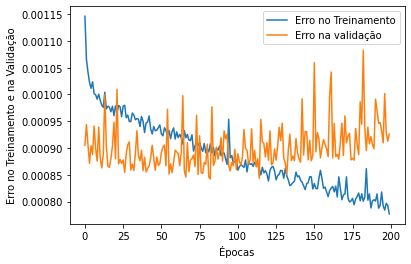

In [99]:
plt.plot(historico_epocas.history['loss'])
plt.plot(historico_epocas.history['val_loss'])
plt.ylabel('Erro no Treinamento e na Validação');
plt.xlabel('Épocas')
plt.legend(['Erro no Treinamento', 'Erro na validação'])

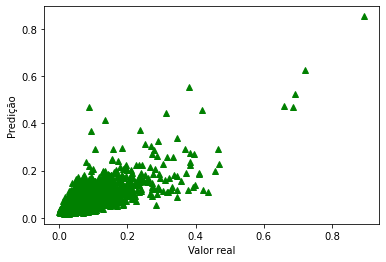

In [103]:
y_predicao = modelo_previsao_preco_casa.predict(X_test)
plt.plot(y_test, y_predicao, "^", color='g')
plt.xlabel('Valor real')
plt.ylabel('Predição');


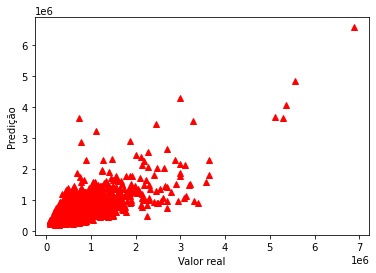

In [105]:
y_predicao_original = scaler.inverse_transform(y_predicao)
y_test_original = scaler.inverse_transform(y_test)

plt.plot(y_test_original, y_predicao_original, "^", color='r')
plt.xlabel('Valor real')
plt.ylabel('Predição');


In [152]:
# Vamos avaliar uma métrica
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test_original, y_predicao_original)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test_original, y_predicao_original)
r2 = r2_score(y_test_original, y_predicao_original)

k = X_test.shape[1]
n = len(X_test)
r2_aj = 1-(1-r2)*(n-1) / (n-k-1)

print('mse: ', mse, ' rmse: ', rmse, ' mae: ', mae, ' r2: ', r2, ' r2_ajustado: ',r2_aj)

mse:  62854932721.47521  rmse:  250708.86047659986  mae:  159882.07558347983  r2:  0.5870992837780837  r2_ajustado:  0.5865636453396935


In [113]:
# vamos adicionar mais características para tentar melhorar o modelo
# antes 'bedrooms', 'bathrooms', 'sqft_living',  'sqft_lot', 'floors', 'sqft_above', 'sqft_basement'
caracteristicas_selecionadas_depois = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built', 
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [115]:
X_depois = casa_df[caracteristicas_selecionadas_depois]

In [117]:
X_depois.head()

bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0         3       1.00         1180      5650     1.0        1180   
1         3       2.25         2570      7242     2.0        2170   
2         2       1.00          770     10000     1.0         770   
3         4       3.00         1960      5000     1.0        1050   
4         3       2.00         1680      8080     1.0        1680   

   sqft_basement  waterfront  view  condition  grade  sqft_above  yr_built  \
0              0           0     0          3      7        1180      1955   
1            400           0     0          3      7        2170      1951   
2              0           0     0          3      6         770      1933   
3            910           0     0          5      7        1050      1965   
4              0           0     0          3      8        1680      1987   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1          1991    98125  47.7210 -122.319           1690        7639  
2             0    98028  47.7379 -122.233           2720        8062  
3             0    98136  47.5208 -122.393           1360        5000  
4             0    98074  47.6168 -122.045           1800        7503

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler_depois = MinMaxScaler()
x_escala_depois = scaler.fit_transform(X_depois)

In [129]:
x_escala_depois

array([[0.09090909, 0.125     , 0.06716981, ..., 0.21760797, 0.16193426,
        0.00574235],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.16611296, 0.22216486,
        0.00802712],
       [0.06060606, 0.125     , 0.03622642, ..., 0.23754153, 0.3994149 ,
        0.00851302],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00155764],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.37375415, 0.17398038,
        0.00073057],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.18272425, 0.10686629,
        0.00081098]])

In [130]:
x_escala_depois.shape

(21613, 19)

In [126]:
y_depois = casa_df['price']

In [127]:
y_depois = y_depois.values.reshape(-1, 1)

In [128]:
y_escala_depois = scaler.fit_transform(y_depois)

In [135]:
modelo_previsao_preco_casa_depois = tf.keras.models.Sequential()

modelo_previsao_preco_casa_depois.add( tf.keras.layers.Dense(units=100, activation='relu', 
                                                      input_shape=(19,) ) )

modelo_previsao_preco_casa_depois.add( tf.keras.layers.Dense(units=100, activation='relu' ) )

modelo_previsao_preco_casa_depois.add( tf.keras.layers.Dense(units=100, activation='relu' ) )

modelo_previsao_preco_casa_depois.add( tf.keras.layers.Dense(units=1, activation='linear' ) )

In [138]:
modelo_previsao_preco_casa_depois.compile(optimizer='Adam', loss='mean_squared_error')

In [140]:
X_train_depois, X_test_depois, y_train_depois, y_test_depois = train_test_split(x_escala_depois, y_escala_depois, test_size=0.25)

In [141]:
historico_epocas_depois = modelo_previsao_preco_casa_depois.fit(X_train_depois, 
                                                                y_train_depois, epochs=200, 
                                                  batch_size=50,
                                                  validation_split=0.25)

Epoch 1/200
244/244 [==============================] - 0s 2ms/step - loss: 8.2178e-04 - val_loss: 5.3350e-04
Epoch 2/200
244/244 [==============================] - 0s 1ms/step - loss: 5.4093e-04 - val_loss: 4.2701e-04
Epoch 3/200
244/244 [==============================] - 0s 1ms/step - loss: 4.7828e-04 - val_loss: 4.0048e-04
Epoch 4/200
244/244 [==============================] - 0s 1ms/step - loss: 4.4819e-04 - val_loss: 4.0285e-04
Epoch 5/200
244/244 [==============================] - 0s 1ms/step - loss: 3.8684e-04 - val_loss: 3.7401e-04
Epoch 6/200
244/244 [==============================] - 0s 1ms/step - loss: 3.9355e-04 - val_loss: 3.5212e-04
Epoch 7/200
244/244 [==============================] - 0s 1ms/step - loss: 3.4918e-04 - val_loss: 3.5579e-04
Epoch 8/200
244/244 [==============================] - 0s 1ms/step - loss: 3.4302e-04 - val_loss: 3.3571e-04
Epoch 9/200
244/244 [==============================] - 0s 1ms/step - loss: 3.3866e-04 - val_loss: 5.2029e-04
Epoch 10/200
244/24

244/244 [==============================] - 0s 1ms/step - loss: 9.5940e-05 - val_loss: 2.5568e-04
Epoch 150/200
244/244 [==============================] - 0s 1ms/step - loss: 1.0612e-04 - val_loss: 2.4994e-04
Epoch 151/200
244/244 [==============================] - 0s 1ms/step - loss: 1.0789e-04 - val_loss: 2.6137e-04
Epoch 152/200
244/244 [==============================] - 0s 1ms/step - loss: 1.0303e-04 - val_loss: 2.7019e-04
Epoch 153/200
244/244 [==============================] - 0s 1ms/step - loss: 1.0678e-04 - val_loss: 2.5431e-04
Epoch 154/200
244/244 [==============================] - 0s 1ms/step - loss: 1.0266e-04 - val_loss: 2.4447e-04
Epoch 155/200
244/244 [==============================] - 0s 1ms/step - loss: 1.0109e-04 - val_loss: 2.7912e-04
Epoch 156/200
244/244 [==============================] - 0s 1ms/step - loss: 1.0224e-04 - val_loss: 2.6686e-04
Epoch 157/200
244/244 [==============================] - 0s 1ms/step - loss: 1.1152e-04 - val_loss: 2.5709e-04
Epoch 158/200
2

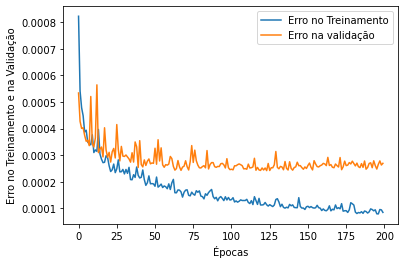

In [142]:
plt.plot(historico_epocas_depois.history['loss'])
plt.plot(historico_epocas_depois.history['val_loss'])
plt.ylabel('Erro no Treinamento e na Validação');
plt.xlabel('Épocas')
plt.legend(['Erro no Treinamento', 'Erro na validação'])

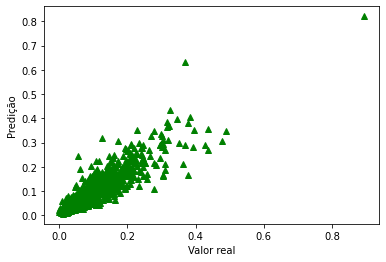

In [145]:
y_predicao_depois = modelo_previsao_preco_casa_depois.predict(X_test_depois)
plt.plot(y_test_depois, y_predicao_depois, "^", color='g')
plt.xlabel('Valor real')
plt.ylabel('Predição');

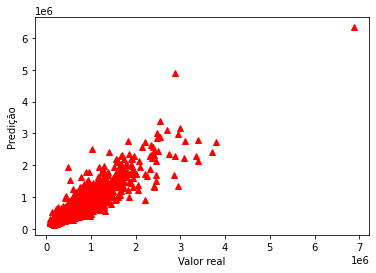

In [146]:
y_predicao_original_depois = scaler.inverse_transform(y_predicao_depois)
y_test_original_depois = scaler.inverse_transform(y_test_depois)

plt.plot(y_test_original_depois, y_predicao_original_depois, "^", color='r')
plt.xlabel('Valor real')
plt.ylabel('Predição');


In [155]:
# Vamos avaliar uma métrica
# https://pt.wikipedia.org/wiki/Coeficiente_de_determina%C3%A7%C3%A3o
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score
from math import sqrt

mse_depois = mean_squared_error(y_test_original_depois, y_predicao_original_depois)
rmse_depois = sqrt(mse_depois)
mae_depois = mean_absolute_error(y_test_original_depois, y_predicao_original_depois)
r2_depois = r2_score(y_test_original_depois, y_predicao_original_depois)

k_depois = X_test_depois.shape[1]
n_depois = len(X_test_depois)
r2_aj_depois = 1-(1-r2_depois)*(n_depois-1) / (n_depois-k_depois-1)

print('mse: ', mse, ' rmse: ', rmse, ' mae: ', mae, ' r2: ', r2, ' r2_ajustado: ',r2_aj)

print('\nmse: ', mse_depois, ' rmse: ', rmse_depois, ' mae: ', mae_depois, ' r2: ', r2_depois, ' r2_ajustado: ',r2_aj_depois)

mse:  62854932721.47521  rmse:  250708.86047659986  mae:  159882.07558347983  r2:  0.5870992837780837  r2_ajustado:  0.5865636453396935

mse:  18041630128.994846  rmse:  134319.13537912178  mae:  74734.50963695874  r2:  0.8532747474427316  r2_ajustado:  0.8527569577327412
